Many statistical tools and techniques used in data analysis are based on probability. Probability measures how likely it is for an event to occur on a scale from 0 (the event never occurs) to 1 (the event always occurs). When working with data, variables in the columns of the data set can be thought of as random variables: variables that vary due to chance. A probability distribution describes how a random variable is distributed; it tells us which values a random variable is most likely to take on and which values are less likely.

In statistics, there are a range of precisely defined probability distributions that have different shapes and can be used to model different types of random events. In this, we'll discuss some common probability distributions and how to work with them in Python.

**The Uniform Distribution**

The uniform distribution is a probability distribution where each value within a certain range is equally likely to occur and values outside of the range never occur. If we make a density plot of a uniform distribution, it appears flat because no value is any more likely (and hence has any more density) than another.

Many useful functions for working with probability distributions in Python are contained in the scipy.stats library. Let's load in some libraries, generate some uniform data and plot a density curve:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline 
import scipy.stats as stats

In [5]:
# generate 10000 numbmers form 0 to 10

uniform_data = stats.uniform.rvs(size = 100000,
                            loc = 0,
                            scale = 10)
uniform_data

array([4.21075848, 8.99297501, 8.88253653, ..., 3.74144429, 9.21299728,
       1.31461587])

In [6]:
# Convert the above data into the pandas dataframe 

uniform_data = pd.DataFrame(uniform_data)

In [7]:
uniform_data

,0
0,4.210758
1,8.992975
2,8.882537
3,9.782977
4,8.509536
...,...
99995,8.509563
99996,8.862618
99997,3.741444
99998,9.212997


<AxesSubplot:ylabel='Density'>

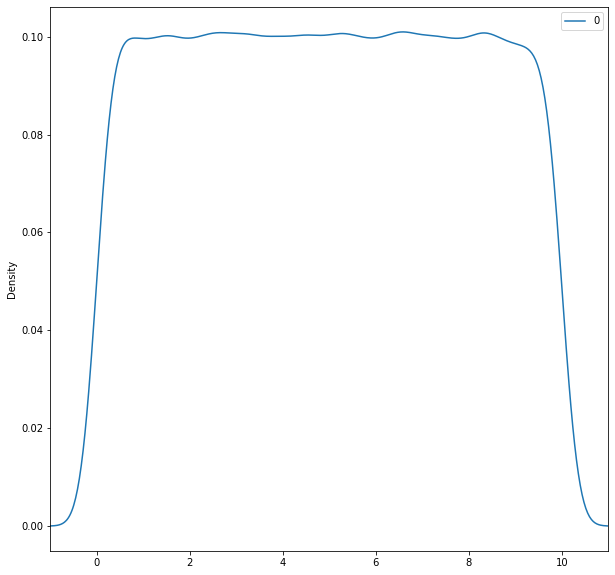

In [9]:
# Plot the data using the density plot 

uniform_data.plot(kind = 'density',
                 figsize = (10,10),
                 xlim = (-1,11))

* In the code above, we generated 100,000 data points from a uniform distribution spanning the range 0 to 10. In the density plot, we see that the density of our uniform data is essentially level, meaning any given value has the same probability of occurring. The area under a probability density curve is always equal to 1.

Probability distributions in scipy come with several useful functions for generating random data and extracting values of interest:

* stats.distribution.rvs() generates random numbers from the specified distribution. The arguments to rvs() will vary depending on the type of distribution you're working with; in the case of the uniform distribution, we have to specify the starting and ending points and the size (number of random points to generate.).

* stats.distribution.cdf() is used to determine the probability that an observation drawn from a distribution falls below a specified value (known as the cumulative distribution function). In essence, cdf() gives you the area under the distribution's density curve to the left of a certain value on the x axis. For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 2.5 and a 75% chance it will fall in the range 2.5 to 10. We can confirm this with cdf():

In [12]:
# Cut off value to check  quantile

stats.uniform.cdf(x = 2.5,
                 loc = 0,
                 scale = 10)

0.25

* stats.distribution.ppf() is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use ppf():

In [14]:
stats.uniform.ppf(q = 0.4,
                 loc = 0,
                 scale = 10)

4.0

* stats.distribution.pdf() gives us the probability density (height of the distribution) at a given x value. Since the uniform distribution is flat, all x values within its range will have the same probability density and x values outside the range have a probability density of 0:

In [16]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


Probability distribution functions in scipy also support median(), mean(), var() and std().

**Generating Random Numbers and Setting The Seed**

When we need to generate random real numbers in a range with equal probability we can draw numbers from a uniform distribution using stats.distribution.rvs(). Python also comes with a library called "random" that lets you perform various operations that involve randomization. Let's look at a few functions in the random library:

In [19]:
import random

random.randint(0,10)

1

In [23]:
random.choice([2,3,5,6,8,9,11])

2

In [24]:
random.random() # get a real number between 0 and 1

0.6112977471594665

In [26]:
random.uniform(0,10) #get a real number between the specified range 

2.521685513504306

Notice that the random library also lets us generate random uniform numbers. Regardless of the method we use to generate random numbers, however, the result of a random process can differ from one run to the next. Having results vary each time you run a function is often not desirable. For example, if we want a colleague to be able to reproduce our results exactly, we can run into problems when we use randomization. we can ensure that our results are the same each time we use a function that involves randomness by setting the random number generator's seed value to initialize it prior to running the function. Set the random seed with random.seed():

In [30]:
random.seed(12) # set the seed to a arbitrary value 

print([random.uniform(0,10) for i in range(4)])

random.seed(12) # set the seed to the same value 

print([random.uniform(0,10) for i in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


Notice that we generated the exact same numbers with both calls to random.uniform() because we set the same seed before each call. If we had not set the seed, we would have gotten different numbers. This reproducibility illustrates the fact that these random numbers aren't truly random, but rather "pseudorandom".

Many functions in Python's libraries that use randomness have an optional random seed argument built in so that you don't have to set the seed outside of the function. For instance, the rvs() function has an optional argument random_state, that lets you set the seed.

**The Normal Distribution**

* The normal or Gaussian distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean) and spread (standard deviation.). The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: 
* as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.

The scipy nickname for the normal distribution is norm. Let's investigate the normal distribution:

In [48]:
prob_under_minus1 = stats.norm.cdf(x = -1,
                                  loc = 0,
                                  scale = 1)

prob_under_1 = stats.norm.cdf(x = 1,
                             loc = 0,
                             scale = 1)

prob_over_1 = 1 - prob_under_1

prob_bw_mminus1_and_1 = 1-(prob_under_minus1 + prob_over_1)

print(prob_under_minus1)

print(prob_bw_mminus1_and_1)
print(prob_over_1)

0.15865525393145707
0.6826894921370859
0.15865525393145707


* The output shows that roughly 16% of the data generated by a normal distribution with mean 0 and standard deviation 1 is below -1, 16% is above 1 and 68% lies between -1 and 1, which agrees with the 68, 95, 99.7 rule. Let's plot the normal distribution and inspect areas we calculated:

Text(1.3, 0.05, '0.16')

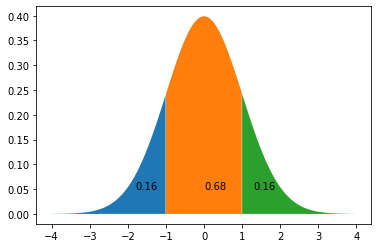

In [54]:
# PLot the normal distribution area  

x1 = np.arange(-4,-1,0.01)
y1 = stats.norm.pdf(x1)

x2 = np.arange(-1,1,0.01)
y2 = stats.norm.pdf(x2)

x3 = np.arange(1,4,0.01)
y3 = stats.norm.pdf(x3)

plt.fill_between(x1,y1)
plt.fill_between(x2,y2)
plt.fill_between(x3,y3)

plt.text(x=-1.8,y = 0.05,
        s = round(prob_under_minus1,2))
plt.text(x=0,y = 0.05,
        s = round(prob_bw_mminus1_and_1,2))
plt.text(x= 1.3,y = 0.05,
        s = round(prob_over_1,2))

. Finding quantiles of the normal distribution is a common task when performing statistical tests. we can check normal distribution quantiles with stats.norm.ppf():

In [55]:
stats.norm.ppf(q = 0.025) # finding the quantile for the 2.5% cutoff 

-1.9599639845400545

In [57]:
stats.norm.ppf(q = 0.975) # finding the quantile for the 97.5% cutoff

1.959963984540054

* Note: a mean of 0 and standard deviation of 1 are default values for the normal distribution.

**The Binomial Distribution**

The binomial distribution is a discrete probability distribution that models the outcomes of a given number of random trails of some experiment or event. The binomial is defined by two parameters: the probability of success in any given trial and the number of trials. The binomial distribution tells you how likely it is to achieve a given number of successes in n trials of the experiment. For example, we could model flipping a fair coin 10 times with a binomial distribution where the number of trials is set to 10 and the probability of success is set to 0.5. In this case the distribution would tell us how likely it is to get zero heads, 1 head, 2 heads and so on.

The scipy name for the binomial is binom. Let's generate and investigate some binomial data:

In [58]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

col_0   0    1    2     3     4     5     6     7    8   9   10
row_0                                                          
counts   7  104  445  1212  2046  2456  2042  1153  430  96   9


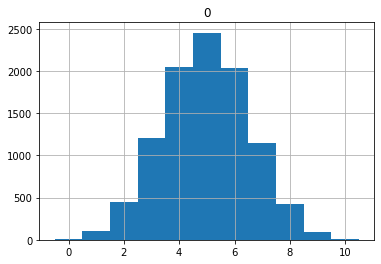

In [66]:
df= pd.crosstab(index = 'counts',
           columns = fair_coin_flips)

# convert it into the pandas dataframe 
print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

Note that since the binomial distribution is discrete, it only takes on integer values so we can summarize binomial data with a frequency table and its distribution with a histogram. The histogram shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. This is reminiscent of the normal distribution, but if we alter the success probability, the distribution won't be symmetric:

col_0   2   3   4    5    6     7     8     9     10
row_0                                               
counts   1   4  61  279  841  2018  3027  2643  1126


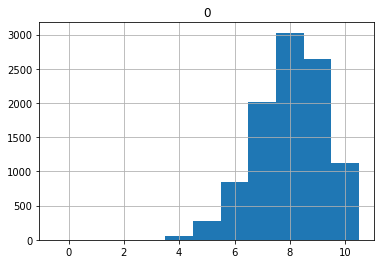

In [67]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11);

The cdf() function lets us check the probability of achieving a number of successes within a certain range:

In [69]:
stats.binom.cdf(k = 5,  # Probablity of k=5 or less
               n = 10,  # with 10 flips
               p = 0.8)  # success probablity is 0.8

0.03279349759999997

For continuous probability density functions, we use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k:

In [70]:
stats.binom.pmf(k = 8, # probablity of k=8
               n = 10, # with 10 flips 
               p = 0.8) #success probablity is 0.8

0.30198988799999993

**The Poisson Distribution**

The Poisson distribution models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution. The Poisson distribution can be used to model traffic, such as the number of arrivals a hospital can expect in a hour's time or the number of emails you'd expect to receive in a week.

The scipy name for the Poisson distribution is "poisson". Let's generate and plot some data from a Poisson distribution with an arrival rate of 1 per time unit:

In [72]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size = 10000, # generate poisson data
                                  mu = 1 )# average arrival rate is 1

In [78]:
pd.crosstab(index = 'counts',
            columns = arrival_rate_1)

col_0,0,1,2,3,4,5,6,7
row_0,,,,,,,,
counts,3653,3709,1850,614,138,28,7,1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

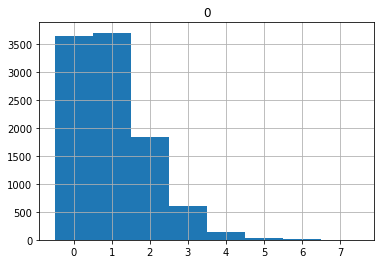

In [81]:
df = pd.DataFrame(arrival_rate_1)
df.hist(range = (-0.5,max(arrival_rate_1)+0.5),
       bins = max(arrival_rate_1)+1)

* The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric:

As with other discrete probability distributions, we can use cdf() to check the probability of achieving more or less than a certain number of successes and pmf() to check the probability of obtaining a specific number of successes:

In [82]:
# Check the probablity of 5 arrivals or less with arrival rate 10

stats.poisson.cdf(k = 5,
                 mu = 10)

0.06708596287903189

In [83]:
# Check the probablity of exactly 10 arrivals with the arrival rate 10

stats.poisson.pmf(k = 10,
                 mu = 10)

0.12511003572113372

* Probability distribution functions are useful for generating random data, modeling random events and aiding with statistical tests and analysis.